In [1]:
import pandas as pd

In [138]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

## data processing

In [139]:
train.head()

,property_id,property_name,property_summary,property_space,property_desc,property_neighborhood,property_notes,property_transit,property_access,property_interaction,...,reviews_rating,reviews_acc,reviews_cleanliness,reviews_checkin,reviews_communication,reviews_location,reviews_value,reviews_per_month,extra,target
0,1,"Chambre à louer,courte durée.","Je loue une chambre dans mon appartement ""atyp...","Espace duplex très grand et lumineux,la chambr...","Je loue une chambre dans mon appartement ""atyp...",NaN,NaN,Accès direct de la Gare du Nord ( 4 arrêts de...,NaN,Je suis entièrement disponible pour tout échan...,...,97.0,10.0,9.0,10.0,10.0,9.0,10.0,1.31,Host Has Profile Pic,26
1,2,Urban Antwerp - Spacious & Authentic Herenhouse,Our place is a typical historic herenhuis clos...,The spaces in our house are all large with hig...,Our place is a typical historic herenhuis clos...,Bar and restaurants One of our favourite bars ...,NaN,In Antwerp we have the system with rental bike...,You will be able to access the following space...,We are always available to help and assist whe...,...,100.0,10.0,10.0,10.0,10.0,8.0,10.0,1.00,"Host Has Profile Pic, Is Location Exact",75
2,3,comfortable apartment in friendly neighborhood,Nice and cozy apartment for couples who like t...,Nice proper and clean apartment. No personal s...,Nice and cozy apartment for couples who like t...,Op 5 minuten lopen zijn er 2 gezellig stadpark...,Public transport is next to the apartment and ...,Fiets verhuur voor de deur. (dag/weekkaart) vi...,As a good host I trust my guest. No secrets an...,"Ik ben altijd bereikbaar voor vragen, maar ben...",...,93.0,10.0,10.0,9.0,9.0,9.0,10.0,0.75,"Host Has Profile Pic, Is Location Exact, Insta...",110
3,4,Historical City Antwerp.,The best place to stay if you like to be in th...,Our rooms are nice and spacious. You stay in a...,The best place to stay if you like to be in th...,In the middle of the historical city of Antwerp,Staying in our house you have to be able to cl...,Tram 10 and 11 from Central station stop in ou...,Beside your own room you can relax in the down...,We will be available to let you know where wha...,...,98.0,10.0,10.0,10.0,10.0,10.0,10.0,6.90,"Host Is Superhost, Host Has Profile Pic, Host ...",60
4,5,Antwerp center city,Our place is right in the heart of the histori...,It is situated in the center if the old town. ...,Our place is right in the heart of the histori...,The neighborhood is in the historical part of ...,NaN,The easiest is just to walk into the city ther...,You will enter the house through the Downstair...,I will be present to help you out with any kin...,...,97.0,10.0,10.0,10.0,10.0,10.0,10.0,4.16,"Host Is Superhost, Host Has Profile Pic, Host ...",55


In [140]:
train.shape

(6495, 55)

In [146]:
train['property_sqfeet'].unique()

array([  nan, 1668., 1453.,    0., 1292.,  269., 1184.,  861.,  484.,
        807.,  431.,  100.,  700.,  646.,  125., 2153.,   85.,  592.,
        538.,  215., 3122.,  753.,  129.,  904.,  915.,  969., 1023.,
       1000., 1615., 1076.,  151.,   90., 1830.,   55.,   25.,  258.,
        517.,  323.,  344.,  452.,  775.,   65., 1345.,  194.,  301.,
        377.,   35.,   40., 3229.,  172.,  160.])

In [147]:
train.isna().sum()

property_id                    0
property_name                 24
property_summary             212
property_space              2309
property_desc                  3
property_neighborhood       2811
property_notes              4522
property_transit            2580
property_access             3135
property_interaction        3404
property_rules              3169
property_zipcode             134
property_lat                   0
property_lon                   0
property_type                  0
property_room_type             0
property_max_guests            0
property_bathrooms            12
property_bedrooms              9
property_beds                 11
property_bed_type              0
property_amenities            52
property_sqfeet             6333
property_scraped_at            0
property_last_updated          0
host_id                        0
host_since                     1
host_location                 33
host_about                  3107
host_response_time          1461
host_respo

In [148]:
free_text_cols = ['property_name', 'property_summary', 'property_space',
       'property_desc', 'property_neighborhood', 'property_notes',
       'property_transit', 'property_access', 'property_interaction',
       'property_rules', 'host_about']
missing_value = ['property_sqfeet']

In [149]:
# can property_id indicate the time the host has been on airbnb?
# host who has more properties will be more expensive? keep host_id?
cols_to_drop= ['property_id'] + free_text_cols + missing_value + ['host_id']
train2 = train.drop(cols_to_drop, axis=1)
train2.head()

,property_zipcode,property_lat,property_lon,property_type,property_room_type,property_max_guests,property_bathrooms,property_bedrooms,property_beds,property_bed_type,...,reviews_rating,reviews_acc,reviews_cleanliness,reviews_checkin,reviews_communication,reviews_location,reviews_value,reviews_per_month,extra,target
0,NaN,50.858451,4.376594,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,...,97.0,10.0,9.0,10.0,10.0,9.0,10.0,1.31,Host Has Profile Pic,26
1,2600,51.194744,4.413748,House,Entire home/apt,4,1.5,2.0,2.0,Real Bed,...,100.0,10.0,10.0,10.0,10.0,8.0,10.0,1.00,"Host Has Profile Pic, Is Location Exact",75
2,2018,51.192501,4.409351,Condominium,Entire home/apt,2,1.0,1.0,1.0,Real Bed,...,93.0,10.0,10.0,9.0,9.0,9.0,10.0,0.75,"Host Has Profile Pic, Is Location Exact, Insta...",110
3,2000,51.220145,4.405446,House,Private room,2,1.0,1.0,1.0,Real Bed,...,98.0,10.0,10.0,10.0,10.0,10.0,10.0,6.90,"Host Is Superhost, Host Has Profile Pic, Host ...",60
4,2000,51.222028,4.404945,House,Private room,2,1.0,1.0,1.0,Real Bed,...,97.0,10.0,10.0,10.0,10.0,10.0,10.0,4.16,"Host Is Superhost, Host Has Profile Pic, Host ...",55


In [150]:
#train2 = train2.host_response_time.add_categories(['missing'])
train2['host_response_time']=train2.host_response_time.fillna('missing')

In [151]:
train2['reviews_first']=train2.reviews_first.fillna('missing')

In [152]:
col_reviews=['reviews_first', 'reviews_last', 'reviews_rating', 'reviews_acc',
       'reviews_cleanliness', 'reviews_checkin', 'reviews_communication',
       'reviews_location', 'reviews_value', 'reviews_per_month']
for i in col_reviews:
    train2[i]=train2[i].fillna('missing')

In [ ]:
#outliers?

In [154]:
# the location are not defined uniformly, better to use zip codes
train2['host_location'].unique()

array(['Brussels, Brussels, Belgium', 'Antwerp, Flanders, Belgium',
       'Belgium', 'Saint-Gilles, Brussels, Belgium',
       'Tübingen, Baden-Wurttemberg, Germany',
       'Schaerbeek, Brussels, Belgium', 'Brussels, Belgium', 'BE',
       'Paris, Île-de-France, France', 'Uccle, Brussels, Belgium',
       'Woluwe-Saint-Lambert, Brussels, Belgium',
       'Watermael-Boitsfort, Brussels, Belgium',
       'Berlin, Berlin, Germany', 'Ixelles, Brussels, Belgium',
       'Brussels, Bruxelles, Belgium', 'France', nan,
       'Amsterdam, North Holland, Netherlands',
       'London, England, United Kingdom', 'Forest, Brussels, Belgium',
       'United States', 'Rennes, Brittany, France',
       'Pantin, Île-de-France, France', 'NL',
       'Etterbeek, Brussels, Belgium',
       "Braine-l'Alleud, Walloon Region, Belgium",
       'Chania, Crete Region, Greece', 'Auderghem, Brussels, Belgium',
       'Naples, Campania, Italy', 'Bergamo, Lombardy, Italy',
       'La Forest-Landerneau, Brittany, F

In [155]:
others = ['host_response_rate', 'property_scraped_at', 'host_location']
# keep location
train3=train2.drop(others,axis=1)
train3.isna().sum()

property_zipcode            134
property_lat                  0
property_lon                  0
property_type                 0
property_room_type            0
property_max_guests           0
property_bathrooms           12
property_bedrooms             9
property_beds                11
property_bed_type             0
property_amenities           52
property_last_updated         0
host_since                    1
host_response_time            0
host_nr_listings              1
host_nr_listings_total        1
host_verified                 0
booking_price_covers          0
booking_min_nights            0
booking_max_nights            0
booking_availability_30       0
booking_availability_60       0
booking_availability_90       0
booking_availability_365      0
booking_cancel_policy         0
reviews_num                   0
reviews_first                 0
reviews_last                  0
reviews_rating                0
reviews_acc                   0
reviews_cleanliness           0
reviews_

In [187]:
# what if the test set has the na for these features?
# later, we can also predict zipcode from the precious position?
train4 =train3.dropna(subset = ['host_since', 'extra', 'property_zipcode'])

In [188]:
train4.isna().sum()

property_zipcode             0
property_lat                 0
property_lon                 0
property_type                0
property_room_type           0
property_max_guests          0
property_bathrooms          11
property_bedrooms            7
property_beds                7
property_bed_type            0
property_amenities          51
property_last_updated        0
host_since                   0
host_response_time           0
host_nr_listings             0
host_nr_listings_total       0
host_verified                0
booking_price_covers         0
booking_min_nights           0
booking_max_nights           0
booking_availability_30      0
booking_availability_60      0
booking_availability_90      0
booking_availability_365     0
booking_cancel_policy        0
reviews_num                  0
reviews_first                0
reviews_last                 0
reviews_rating               0
reviews_acc                  0
reviews_cleanliness          0
reviews_checkin              0
reviews_

In [189]:
train4['property_bathrooms']=train4['property_bathrooms'].fillna(0)
train4['property_beds']=train4['property_beds'].fillna(0)
train4['property_bedrooms']=train4['property_bedrooms'].fillna(0)
train4['property_amenities']=train4['property_amenities'].fillna('missing')

/var/folders/ps/310fvxcx6y55_xvdkg77780h0000gn/T/ipykernel_65704/3397865589.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train4['property_bathrooms']=train4['property_bathrooms'].fillna(0)
/var/folders/ps/310fvxcx6y55_xvdkg77780h0000gn/T/ipykernel_65704/3397865589.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train4['property_beds']=train4['property_beds'].fillna(0)
/var/folders/ps/310fvxcx6y55_xvdkg77780h0000gn/T/ipykernel_65704/3397865589.py:3: SettingWithCopyWarning: 
A value is trying to be

In [190]:
train4.isna().sum()

property_zipcode            0
property_lat                0
property_lon                0
property_type               0
property_room_type          0
property_max_guests         0
property_bathrooms          0
property_bedrooms           0
property_beds               0
property_bed_type           0
property_amenities          0
property_last_updated       0
host_since                  0
host_response_time          0
host_nr_listings            0
host_nr_listings_total      0
host_verified               0
booking_price_covers        0
booking_min_nights          0
booking_max_nights          0
booking_availability_30     0
booking_availability_60     0
booking_availability_90     0
booking_availability_365    0
booking_cancel_policy       0
reviews_num                 0
reviews_first               0
reviews_last                0
reviews_rating              0
reviews_acc                 0
reviews_cleanliness         0
reviews_checkin             0
reviews_communication       0
reviews_lo

In [191]:
test.isna().sum()

property_id                   0
property_name                 3
property_summary             13
property_space              352
property_desc                 1
property_neighborhood       464
property_notes              598
property_transit            427
property_access             473
property_interaction        520
property_rules              480
property_zipcode             14
property_lat                  0
property_lon                  0
property_type                 0
property_room_type            0
property_max_guests           0
property_bathrooms            1
property_bedrooms             0
property_beds                 3
property_bed_type             0
property_amenities            9
property_sqfeet             889
property_scraped_at           0
property_last_updated         0
host_id                       0
host_since                    0
host_location                 7
host_about                  411
host_response_time          196
host_response_rate          196
host_nr_

In [192]:
df=train4.copy()

In [193]:
df.head()

,property_zipcode,property_lat,property_lon,property_type,property_room_type,property_max_guests,property_bathrooms,property_bedrooms,property_beds,property_bed_type,...,reviews_rating,reviews_acc,reviews_cleanliness,reviews_checkin,reviews_communication,reviews_location,reviews_value,reviews_per_month,extra,target
1,2600,51.194744,4.413748,House,Entire home/apt,4,1.5,2.0,2.0,Real Bed,...,100.0,10.0,10.0,10.0,10.0,8.0,10.0,1.0,"Host Has Profile Pic, Is Location Exact",75
2,2018,51.192501,4.409351,Condominium,Entire home/apt,2,1.0,1.0,1.0,Real Bed,...,93.0,10.0,10.0,9.0,9.0,9.0,10.0,0.75,"Host Has Profile Pic, Is Location Exact, Insta...",110
3,2000,51.220145,4.405446,House,Private room,2,1.0,1.0,1.0,Real Bed,...,98.0,10.0,10.0,10.0,10.0,10.0,10.0,6.9,"Host Is Superhost, Host Has Profile Pic, Host ...",60
4,2000,51.222028,4.404945,House,Private room,2,1.0,1.0,1.0,Real Bed,...,97.0,10.0,10.0,10.0,10.0,10.0,10.0,4.16,"Host Is Superhost, Host Has Profile Pic, Host ...",55
5,1060,50.830194,4.350654,House,Private room,2,2.0,1.0,1.0,Real Bed,...,94.0,10.0,8.0,10.0,10.0,9.0,10.0,3.56,"Host Has Profile Pic, Host Identity Verified, ...",139


In [194]:
import datetime
now=datetime.datetime.now()

In [195]:
df['host_since']=pd.to_datetime(df['host_since'])
df['host_days'] = (now-df['host_since']).dt.days
df = df.drop('host_since', axis=1)

In [196]:
#df['property_scraped_at'].unique()
#array(['2017-05-12', '2017-05-08', '2017-05-09'], dtype=object)

In [197]:
pd.get_dummies(df).shape # cannot use dummy encoding

(6357, 9095)

In [198]:
object_type_cols=list(df.select_dtypes(include='object').columns)

In [199]:
list(df.columns)

['property_zipcode',
 'property_lat',
 'property_lon',
 'property_type',
 'property_room_type',
 'property_max_guests',
 'property_bathrooms',
 'property_bedrooms',
 'property_beds',
 'property_bed_type',
 'property_amenities',
 'property_last_updated',
 'host_response_time',
 'host_nr_listings',
 'host_nr_listings_total',
 'host_verified',
 'booking_price_covers',
 'booking_min_nights',
 'booking_max_nights',
 'booking_availability_30',
 'booking_availability_60',
 'booking_availability_90',
 'booking_availability_365',
 'booking_cancel_policy',
 'reviews_num',
 'reviews_first',
 'reviews_last',
 'reviews_rating',
 'reviews_acc',
 'reviews_cleanliness',
 'reviews_checkin',
 'reviews_communication',
 'reviews_location',
 'reviews_value',
 'reviews_per_month',
 'extra',
 'target',
 'host_days']

In [200]:
object_type_cols

['property_zipcode',
 'property_type',
 'property_room_type',
 'property_bed_type',
 'property_amenities',
 'property_last_updated',
 'host_response_time',
 'host_verified',
 'booking_cancel_policy',
 'reviews_first',
 'reviews_last',
 'reviews_rating',
 'reviews_acc',
 'reviews_cleanliness',
 'reviews_checkin',
 'reviews_communication',
 'reviews_location',
 'reviews_value',
 'reviews_per_month',
 'extra']

In [201]:
from sklearn import preprocessing
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'species'.
for i in object_type_cols:
    df[i] = df[i].astype(str)
    df[i]= label_encoder.fit_transform(df[i])

## simple model (include only important features, exclude free text cols for now)

In [202]:
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(df, test_size=0.2)
X_train=train_df.drop('target',axis=1)
y_train=train_df['target']

y_val=val_df['target']

In [203]:
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor

tree_model = RandomForestRegressor(max_depth=30, random_state=0)
tree_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=30, random_state=0)

In [204]:
%matplotlib inline
import matplotlib.pyplot as plt
import time


In [205]:
X_train.shape

(5085, 37)

<BarContainer object of 37 artists>

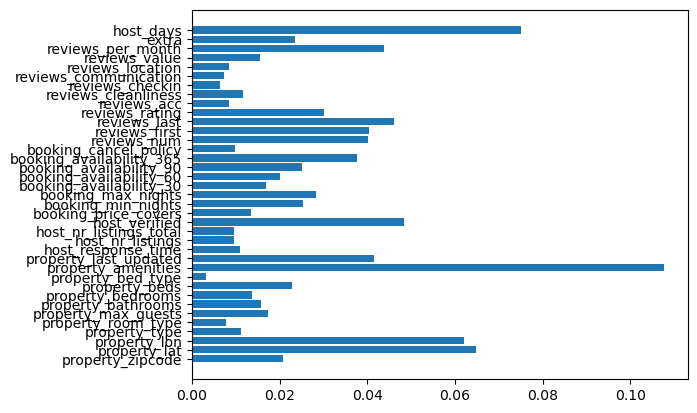

In [206]:
plt.barh(list(X_train.columns), tree_model.feature_importances_)

In [207]:
feature_importance_df=pd.DataFrame(list(X_train.columns), tree_model.feature_importances_).reset_index()
feature_importance_df.columns=['score','feature']
select=list(feature_importance_df.sort_values(by='score', ascending=False).iloc[:15,:].feature)
select

['property_amenities',
 'host_days',
 'property_lat',
 'property_lon',
 'host_verified',
 'reviews_last',
 'reviews_per_month',
 'property_last_updated',
 'reviews_first',
 'reviews_num',
 'booking_availability_365',
 'reviews_rating',
 'booking_max_nights',
 'booking_min_nights',
 'booking_availability_90']

In [208]:
print("Regression coefficient:",tree_model.score(X_train,y_train))

Regression coefficient: 0.8513211919284398


In [209]:
X_train2=train_df.drop('target',axis=1)
y_train2=train_df['target']

In [217]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=50, random_state=0)
regr.fit(X_train2[select], y_train2)

#regr.fit(X_train, y_train)

#regr.predict([[0, 0, 0, 0]]))

RandomForestRegressor(max_depth=50, random_state=0)

In [218]:
import math
import sklearn.metrics

In [219]:
mse = sklearn.metrics.mean_squared_error(regr.predict(X_train2[select]), y_train2)
print(math.sqrt(mse))

21.018663414231344


In [220]:
X_val=val_df[select]

In [221]:
mse = sklearn.metrics.mean_squared_error(regr.predict(X_val), y_val)
print(math.sqrt(mse))

46.05772936433269


In [222]:
print("Regression coefficient:",regr.score(X_train2[select],y_train2))

Regression coefficient: 0.8492471121351259


In [223]:
from sklearn.metrics import r2_score

coefficient_of_dermination = r2_score(y_val, regr.predict(X_val))
print(coefficient_of_dermination)

-0.13575790315288727
